# Combined Cycle Power Plant Data Set

### The dataset contains data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.

#### (a) Download the Combined Cycle Power Plantdata from: https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant.

In [1]:
import xlrd
import pandas as pd
import csv
import openpyxl

Datapath = '/Users/chenshengjie/Desktop/INF552/CCPP/Folds5x2_pp.xlsx'
xls = pd.ExcelFile(Datapath)
df1 = pd.read_excel(xls, 'Sheet1', index = False)
data = df1
print(data)

         AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
5     26.27  59.44  1012.23  58.77  443.67
6     15.89  43.96  1014.02  75.24  467.35
7      9.48  44.71  1019.12  66.43  478.42
8     14.64  45.00  1021.78  41.25  475.98
9     11.74  43.56  1015.14  70.72  477.50
10    17.99  43.72  1008.64  75.04  453.02
11    20.14  46.93  1014.66  64.22  453.99
12    24.34  73.50  1011.31  84.15  440.29
13    25.71  58.59  1012.77  61.83  451.28
14    26.19  69.34  1009.48  87.59  433.99
15    21.42  43.79  1015.76  43.08  462.19
16    18.21  45.00  1022.86  48.84  467.54
17    11.04  41.74  1022.60  77.51  477.20
18    14.45  52.75  1023.97  63.59  459.85
19    13.97  38.47  1015.15  55.28  464.30
20    17.76  42.42  1009.09  66.26  468.27
21     5.41  40.07  1019.16  64.77  495.24
22     7.76

#### (b) Exploring the data:
#### i. How many rows are in this data set? How many columns? What do the rows and columns represent?

In [8]:
print('size of columns:', data.columns.size)
print('size of rows:', data.iloc[:,0].size)

print('AT means Average Temperature, V means Exhaust Vacuum, AP means Ambient Pressure, RH means Relative Humidity and PE means electrical energy output.')
print('47840 rows mean that data has 47840 examples.')

size of columns: 5
size of rows: 9568
AT means Average Temperature, V means Exhaust Vacuum, AP means Ambient Pressure, RH means Relative Humidity and PE means electrical energy output.
47840 rows mean that data has 47840 examples.


#### ii. Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your ﬁndings.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.pairplot(data, vars=['AT', 'V', 'AP', 'RH', 'PE'], size = 12)
plt.show()

print('The linear relationships between AT and PE, V and PE, AP and PE, RH and PE are getting worse.')

The linear relationships between AT and PE, V and PE, AP and PE, RH and PE are getting worse.


#### iii. What are the mean, the median, range, ﬁrst and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [72]:
data.describe() #基本统计量和分位数

AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.080000  1012.940000    74.975000   451.550000
75%      25.720000    66.540000  1017.260000    84.830000   468.430000
max      37.110000    81.560000  1033.300000   100.160000   495.760000

In [7]:
datarange = (data.max() - data.min())
mean = data.mean()
median = data.median()
firstquartile = data.quantile(.25)
thirdquartile = data.quantile(.75)
IQR = data.quantile(.75) - data.quantile(.25)

In [8]:
stat = {'data':['mean','median','range','first quartile','third quartile','interquartile ranges'],'AT':[mean[0],median[0],datarange[0],firstquartile[0], thirdquartile[0], IQR[0]], 'V':[mean[1],median[1],datarange[1],firstquartile[1], thirdquartile[1], IQR[1]],'AP':[mean[2],median[2],datarange[2],firstquartile[2], thirdquartile[2], IQR[2]],'RH':[mean[3],median[3],datarange[3],firstquartile[3], thirdquartile[3], IQR[3]],'PE':[mean[4],median[4],datarange[4],firstquartile[4], thirdquartile[4], IQR[4]]}
stattable = pd.DataFrame(stat)
stattable

data         AT          V           AP         RH  \
0                  mean  19.651231  54.305804  1013.259078  73.308978   
1                median  20.345000  52.080000  1012.940000  74.975000   
2                 range  35.300000  56.200000    40.410000  74.600000   
3        first quartile  13.510000  41.740000  1009.100000  63.327500   
4        third quartile  25.720000  66.540000  1017.260000  84.830000   
5  interquartile ranges  12.210000  24.800000     8.160000  21.502500   

           PE  
0  454.365009  
1  451.550000  
2   75.500000  
3  439.750000  
4  468.430000  
5   28.680000

#### (c) For each predictor, ﬁt a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically signiﬁcant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

AT
 
[-2.17131996]
 
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Sun, 23 Sep 2018   Prob (F-statistic):               0.00
Time:                        15:12:21   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.15

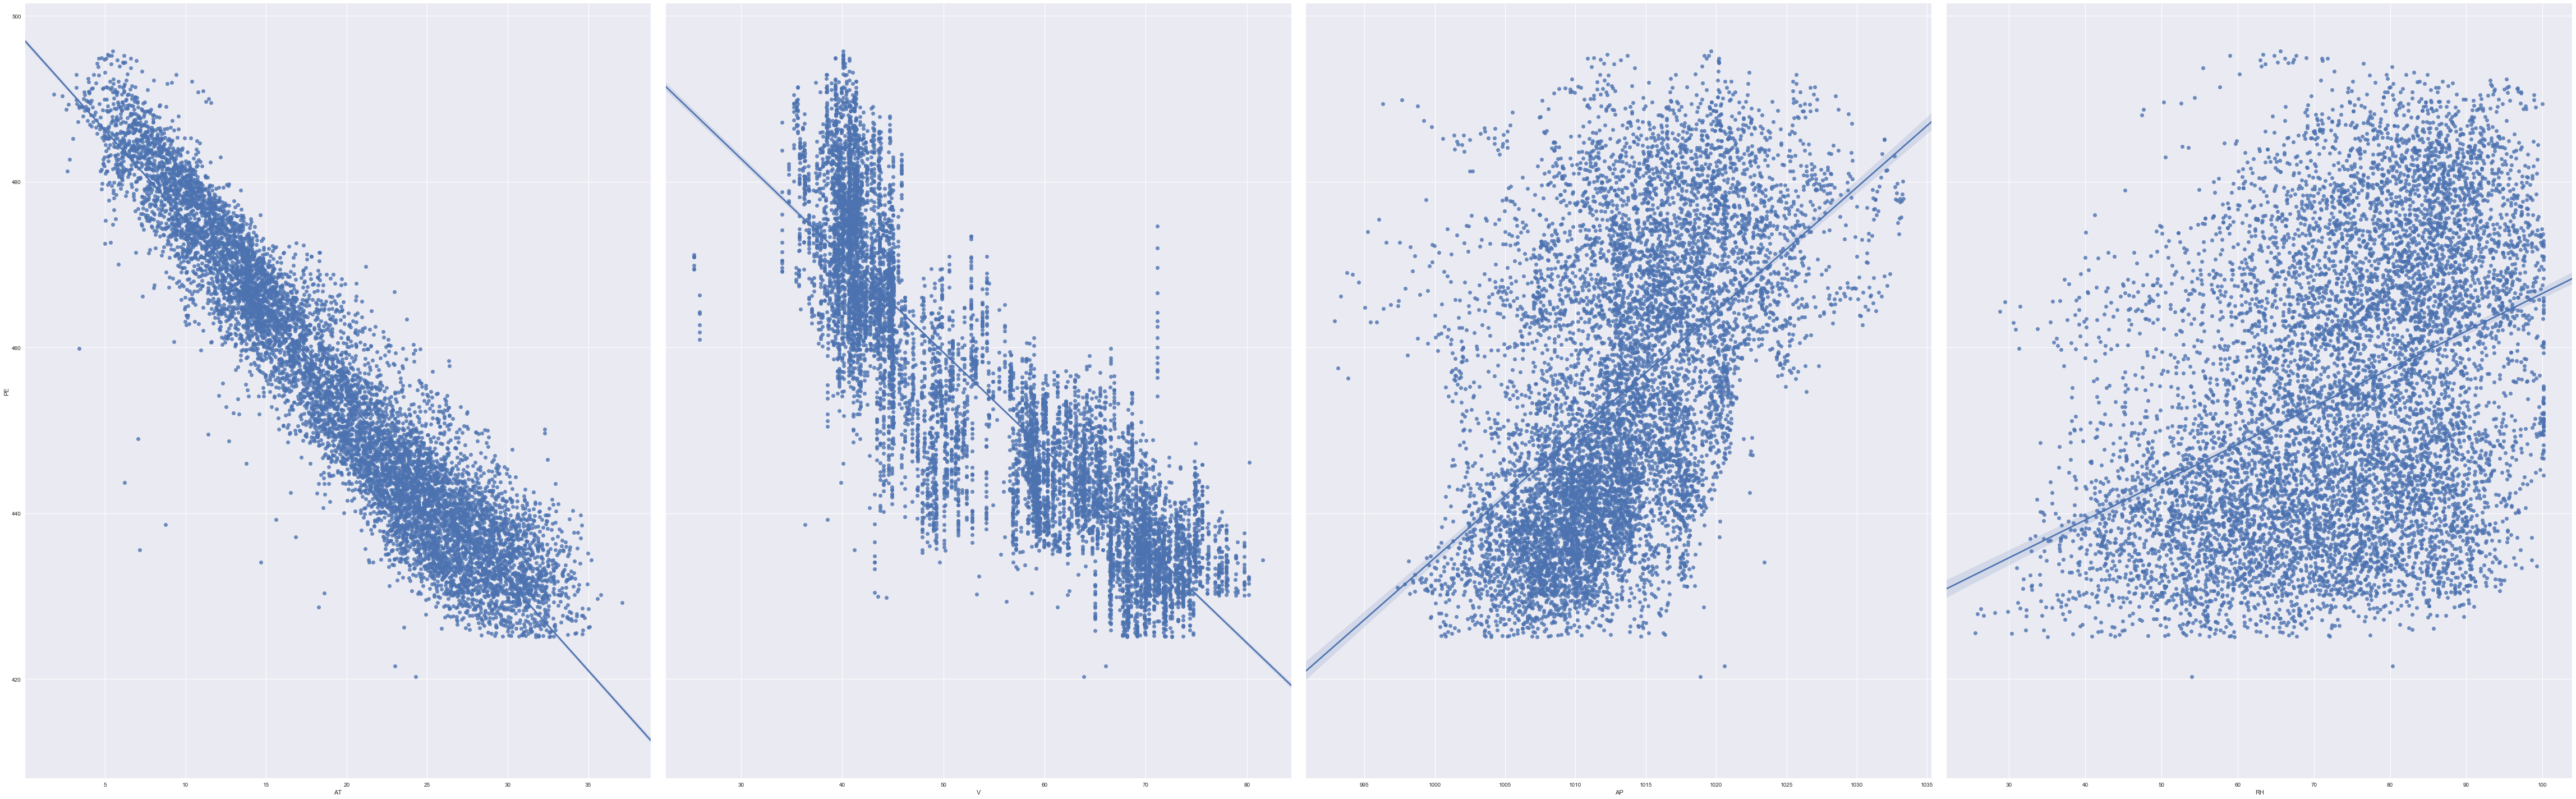

In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
#dataAT = data[['AT', 'PE']]
sns.pairplot(data, x_vars=['AT','V','AP', 'RH'], y_vars='PE', size=20, aspect=0.8, kind='reg')
X = ['AT', 'V', 'AP', 'RH']
#Y = data['PE']
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
trainY = data['PE']
for word in X:     
    modelAT = linreg.fit(data[[word]], trainY)
    print(word)
    print(' ')
    print(linreg.coef_)
    print(' ')
    multix = data[word].values
    statx = multix.reshape(-1, 1)
    multiy = data['PE'].values
    staty = multiy.reshape(-1, 1)
    statx = sm.add_constant(statx)
    modelstat = sm.OLS(staty, statx).fit()
    print(modelstat.summary())
    
print(' ')
print(' ')
print(' ')
print('In each model, the relationship between predictor and the response is statistically significant.')
print('YES, there are some outliers.')
print(' ')
print(' ')

#### (d) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H 0 : β j = 0?

In [5]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
trainX2 = data[['AT', 'V', 'AP', 'RH']]
trainY = data['PE']
linreg = LinearRegression()
model = linreg.fit(trainX2, trainY)
print(model.score(trainX2,trainY))
print(model)
print(linreg.intercept_)
print(linreg.coef_)
trainX2 = sm.add_constant(trainX2)
model2 = sm.OLS(trainY, trainX2).fit()
print(model2.summary())
print(' ')

print(' ')
print('All predictors can we reject the null hypothesis H0 :βj =0.')

0.9286960898122536
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
454.6092743153102
[-1.97751311 -0.23391642  0.06208294 -0.1580541 ]
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Sun, 23 Sep 2018   Prob (F-statistic):               0.00
Time:                        15:12:26   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t   

#### (e) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coeﬃcients from 1c on the x-axis, and the multiple regression coeﬃcients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coeﬃcient in a simple linear regression model is shown on the x-axis, and its coeﬃcient estimate in the multiple linear regression model is shown on the y-axis.

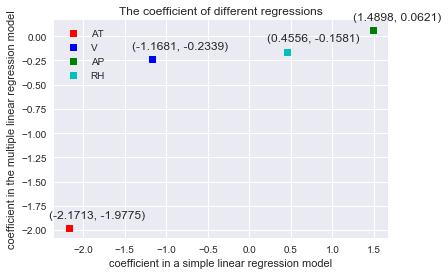

In [11]:
plt.title('The coefficient of different regressions')
plt.plot(-2.1713, -1.9775, 'rs', label='AT')
plt.annotate("(-2.1713, -1.9775)", xy=(-2.1713, -1.9775), xytext=(-20, 10), textcoords='offset points')
plt.plot(-1.1681, -0.2339, 'bs', label='V')
plt.annotate("(-1.1681, -0.2339)", xy=(-1.1681, -0.2339), xytext=(-20, 10), textcoords='offset points')
plt.plot(1.4898, 0.0621, 'gs', label='AP')
plt.annotate("(1.4898, 0.0621)", xy=(1.4898, 0.0621), xytext=(-20, 10), textcoords='offset points')
plt.plot(0.4556, -0.1581, 'cs', label='RH')
plt.annotate("(0.4556, -0.1581)", xy=(0.4556, -0.1581), xytext=(-20, 10), textcoords='offset points')
plt.legend()
plt.xlabel('coefficient in a simple linear regression model')
plt.ylabel('coefficient in the multiple linear regression model')
plt.show()

#### (f) Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, ﬁt a model of the form
#### Y = β 0 + β 1 X + β 2 X^2 + β 3 X^3 + ℹ️

There are evidence to show nonlinear association between any of the predictors and the response.
 
AT
[492.72814334]
[[ 0.         -0.61034571 -0.12513818  0.00267485]]


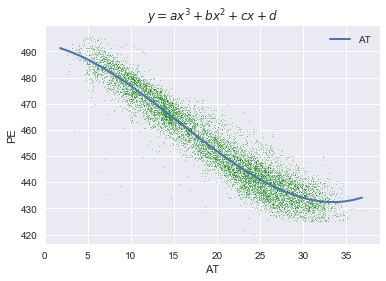

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Sun, 23 Sep 2018   Prob (F-statistic):               0.00
Time:                        14:32:54   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.0

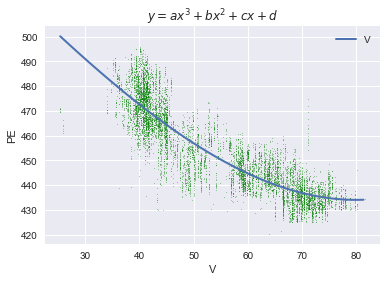

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Sun, 23 Sep 2018   Prob (F-statistic):               0.00
Time:                        14:32:54   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151     60.557      0.0

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Sun, 23 Sep 2018   Prob (F-statistic):               0.00
Time:                        14:32:54   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0747      0.009      8.415      0.0

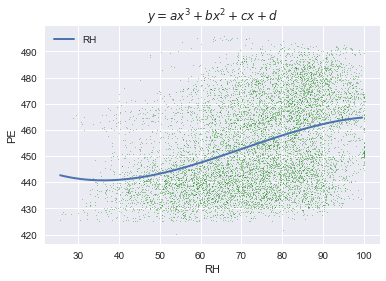

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Sun, 23 Sep 2018   Prob (F-statistic):               0.00
Time:                        14:32:54   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.4135     10.545     44.422      0.0

In [18]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.pipeline import make_pipeline

X = ['AT', 'V', 'AP', 'RH']
print ('There are evidence to show nonlinear association between any of the predictors and the response.')
print(' ')
for word in X:
    print(word)
    multix = data[word].values
    multix = multix.reshape(-1, 1)
    multiy = data['PE'].values
    multiy = multiy.reshape(-1, 1)

    pr = LinearRegression()
    X_fit = np.arange(data[word].min(), data[word].max(), 1).reshape(-1, 1)
    multimodel = PolynomialFeatures(degree = 3)
    multimodels = X_quad = multimodel.fit_transform(multix)
    pr.fit(X_quad, multiy)
    yy = pr.predict(multimodel.fit_transform(X_fit))
    
    #print(multimodels)
    print(pr.intercept_)
    print(pr.coef_)

    plt.plot(multix, multiy, 'g.',markersize = 1)
    plt.title('$y = ax^3 + bx^2 + cx + d$')
    plt.xlabel(word)
    plt.ylabel('PE')
    plt.plot(X_fit, yy,label=word, lw= 2)
    plt.legend()
    plt.show()
    
    statmultix = np.column_stack((multix, multix**2, multix**3))
    statmultix = sm.add_constant(statmultix)
    modelstatmultix = sm.OLS(multiy, statmultix).fit()
    print(modelstatmultix.summary())

print(' ')
print(' ')
print('Only V^2 and V^3 are not statistically significant.')

#### (g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically signiﬁcant.

In [20]:
data = pd.read_excel(xls, 'Sheet1', index = False)

data1 = data[['AT', 'V', 'AP', 'RH']]
interactionx = data[['AT','V']].values
interactionx = interactionx[:, 0] * interactionx[:, 1]
df1 = pd.DataFrame(interactionx, columns = ['AT*V'])
interactionx = data[['AT','AP']].values
interactionx = interactionx[:, 0] * interactionx[:, 1]
df2 = pd.DataFrame(interactionx, columns = ['AT*AP'])
interactionx = data[['AT','RH']].values
interactionx = interactionx[:, 0] * interactionx[:, 1]
df3 = pd.DataFrame(interactionx, columns = ['AT*RH'])
interactionx = data[['V','AP']].values
interactionx = interactionx[:, 0] * interactionx[:, 1]
df4 = pd.DataFrame(interactionx, columns = ['V*AP'])
interactionx = data[['V','RH']].values
interactionx = interactionx[:, 0] * interactionx[:, 1]
df5 = pd.DataFrame(interactionx, columns = ['V*RH'])
interactionx = data[['AP','RH']].values
interactionx = interactionx[:, 0] * interactionx[:, 1]
df6 = pd.DataFrame(interactionx, columns = ['AP*RH'])


frames = [data1, df1, df2, df3, df4, df5, df6]
result = pd.concat(frames,axis=1)
interactiony = data['PE'].values
#interactiony = interactiony.reshape(-1, 1)

result = sm.add_constant(result)
model = sm.OLS(interactiony, result).fit()
print(model.summary())

print('')
print('')
print('')
print('There are  AT and V, AT and RH, V and AP are statistically significant.')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Sun, 23 Sep 2018   Prob (F-statistic):               0.00
Time:                        14:34:01   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

#### (h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insigniﬁcant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.

In [21]:
from sklearn import metrics
data = pd.read_excel(xls, 'Sheet1', index = False)

ATx = data['AT'].values
ATx = ATx.reshape(-1, 1)
ATx = np.column_stack((ATx, ATx**2))
ATx = pd.DataFrame(ATx, columns=['AT','AT^2'])

Vx = data['V'].values
Vx = Vx.reshape(-1, 1)
Vx = np.column_stack((Vx, Vx**2))
Vx = pd.DataFrame(Vx, columns=['V','V^2'])

APx = data['AP'].values
APx = APx.reshape(-1, 1)
APx = np.column_stack((APx, APx**2))
APx = pd.DataFrame(APx, columns=['AP','AP^2'])

RHx = data['RH'].values
RHx = RHx.reshape(-1, 1)
RHx = np.column_stack((RHx, RHx**2))
RHx = pd.DataFrame(RHx, columns=['RH','RH^2'])

framesall = [df1, df2, df3, df4, df5, df6, ATx, Vx, APx, RHx]
allx = pd.concat(framesall,axis=1)

multiy = data['PE'].values
multiy = multiy.reshape(-1, 1)

ally = data['PE']
allxy = pd.concat([allx, ally], axis = 1)
sample = allxy.sample(n=None, frac = 0.7)
trainallx = sample.iloc[:,0:14]
#print(trainallx)
trainally = sample['PE']

singleall = allxy[['AT', 'V', 'AP', 'RH', 'PE']]
singlesample = sample[['AT', 'V', 'AP', 'RH', 'PE']]
trainsinglex = singlesample.iloc[:,0:4]
trainsingley = singlesample['PE']

trainsinglex = sm.add_constant(trainsinglex)
modelsingle = sm.OLS(trainsingley, trainsinglex).fit()
print(modelsingle.summary())

trainpredictsingle = modelsingle.predict(trainsinglex)
MSEtrainsingle = metrics.mean_squared_error(trainsingley, trainpredictsingle)
print('MSE of variable model using train data:', MSEtrainsingle)

testsinglex = singleall.drop(singlesample.index).iloc[:, 0:4]
testsingley = singleall.drop(singlesample.index)['PE']
testsinglex = sm.add_constant(testsinglex)
testpredictsingle = modelsingle.predict(testsinglex)
MSEtestsingle = metrics.mean_squared_error(testsingley, testpredictsingle)
print('MSE of variable model using test data:', MSEtestsingle)




trainallx = sm.add_constant(trainallx)
modelall = sm.OLS(trainally, trainallx).fit()
print(modelall.summary())

trainpredict = modelall.predict(trainallx)
#print(type(trainpredict))
MSEtrainall = metrics.mean_squared_error(trainally, trainpredict)
print('MSE of all variable model using train data:', MSEtrainall)

testallx = allxy.drop(sample.index).iloc[:, 0:14]
testally = allxy.drop(sample.index)['PE']
testallx = sm.add_constant(testallx)
testpredict = modelall.predict(testallx)
MSEtestall = metrics.mean_squared_error(testally, testpredict)
print('MSE of all variable model using test data:', MSEtestall)
print('')
print('Remove AT*AP, V*AP, V*RH, AT, V, V^2. ')
print('')
print('')


remy = data['PE']
remxy = allxy[['AT*V', 'AT*RH', 'AP*RH', 'AT^2', 'AP', 'AP^2','RH', 'RH^2', 'PE']]
remsample = sample[['AT*V', 'AT*RH', 'AP*RH', 'AT^2', 'AP', 'AP^2','RH','RH^2', 'PE']]
#print(remsample)
trainremx = remsample.iloc[:,0:8]
trainremy = remsample['PE']

trainremx = sm.add_constant(trainremx)
modelrem = sm.OLS(trainremy, trainremx).fit()
print(modelrem.summary())

trainpredictrem = modelrem.predict(trainremx)
MSEtrainrem = metrics.mean_squared_error(trainremy, trainpredictrem)
print('MSE of significant variable model using train data:', MSEtrainrem)

testremx = remxy.drop(remsample.index).iloc[:, 0:8]
testremy = remxy.drop(remsample.index)['PE']
testremx = sm.add_constant(testremx)
testpredictrem = modelrem.predict(testremx)
MSEtestrem = metrics.mean_squared_error(testremy, testpredictrem)
print('MSE of significant variable model using test data:', MSEtestrem)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.176e+04
Date:                Sun, 23 Sep 2018   Prob (F-statistic):               0.00
Time:                        14:34:06   Log-Likelihood:                -19686.
No. Observations:                6698   AIC:                         3.938e+04
Df Residuals:                    6693   BIC:                         3.942e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        452.9448     11.624     38.967      0.0

#### (i) KNN Regression:
#### i. Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈ {1, 2, . . . , 100} that gives you the best ﬁt. Plot the train and test errors in terms of 1/k.

3
1.347667044112451e-06


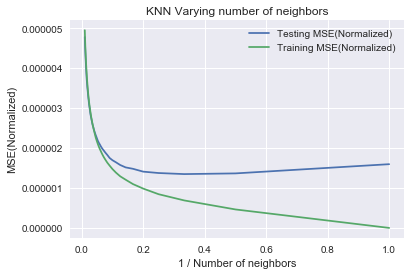

4
15.3897162129791


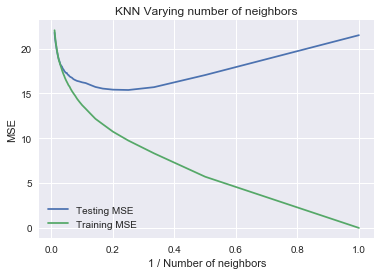

In [16]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.preprocessing import scale

KNNdata = data[['AT', 'V', 'AP', 'RH', 'PE']]

#df_x_train = KNNdata[['AT', 'V', 'AP', 'RH']]
#df_y_train = KNNdata[['PE']]

#df_x_train = KNNdata[['AT', 'V', 'AP', 'RH']].values

KNNtrain= KNNdata.sample(n=None, frac = 0.7)
KNNtest= KNNdata.drop(KNNtrain.index)[['AT', 'V', 'AP', 'RH','PE']]

KNNtrain1 = KNNtrain[['AT', 'V', 'AP', 'RH','PE']]
KNNtrain1 = KNNtrain1.values
normalizer = preprocessing.Normalizer().fit(KNNtrain1)
KNNtrain1 = normalizer.transform(KNNtrain1)
KNNtrain1 = pd.DataFrame(KNNtrain1, columns=['AT', 'V', 'AP', 'RH','PE'])
#KNNdata = KNNdata.values
#normalizer = preprocessing.Normalizer().fit(KNNdata)
#KNNdata = normalizer.transform(KNNdata)
#KNNdata = pd.DataFrame(KNNdata, columns=['AT', 'V', 'AP', 'RH', 'PE'])

df_x_train = KNNtrain1[['AT', 'V', 'AP', 'RH']]
df_y_train = KNNtrain1[['PE']]

KNNtest1 = KNNtest[['AT', 'V', 'AP', 'RH','PE']]
KNNtest1 = KNNtest1.values
normalizer = preprocessing.Normalizer().fit(KNNtest1)
KNNtest1 = normalizer.transform(KNNtest1)
KNNtest1 = pd.DataFrame(KNNtest1, columns=['AT', 'V', 'AP', 'RH','PE'])

df_x_test = KNNtest1[['AT', 'V', 'AP', 'RH']]
df_y_test = KNNtest1[['PE']]

neighbors = np.arange(1,101)
train_error =np.empty(len(neighbors))
test_error = np.empty(len(neighbors))


bestk = 0
bestscore = 1000
for i,k in enumerate(neighbors):
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(df_x_train, df_y_train)
    knntrainy = knn.predict(df_x_train)
    knntesty = knn.predict(df_x_test)
    trainerror = metrics.mean_squared_error(df_y_train, knntrainy)
    testerror = metrics.mean_squared_error(df_y_test, knntesty)
    if testerror < bestscore:
        bestscore = testerror
        bestk = k
    train_error[i] = trainerror
    test_error[i] = testerror
    #train_error[i] = (1 - knn.score(df_x_train, df_y_train, sample_weight = None))*df_x_train.size
    #test_error[i] = (1 - knn.score(df_x_test, df_y_test, sample_weight = None))*df_x_test.size

print(bestk)
print(bestscore)
plt.title('KNN Varying number of neighbors')
plt.plot(1 / neighbors, test_error, label='Testing MSE(Normalized)')
plt.plot(1 / neighbors, train_error, label='Training MSE(Normalized)')
plt.legend()
plt.xlabel('1 / Number of neighbors')
plt.ylabel('MSE(Normalized)')
plt.show()


KNNdata = data[['AT', 'V', 'AP', 'RH', 'PE']]

neighbors = np.arange(1,101)
train_error =np.empty(len(neighbors))
test_error = np.empty(len(neighbors))


df_x_train = KNNtrain[['AT', 'V', 'AP', 'RH']]
df_y_train = KNNtrain[['PE']]

df_x_test = KNNtest[['AT', 'V', 'AP', 'RH']]
df_y_test = KNNtest['PE']

bestk = 0
bestscore = 1000000
for i,k in enumerate(neighbors):
    knn = KNeighborsRegressor(n_neighbors = k, p = 2)
    knn.fit(df_x_train, df_y_train)
    knntrainy = knn.predict(df_x_train)
    knntesty = knn.predict(df_x_test)
    trainerror = metrics.mean_squared_error(df_y_train, knntrainy)
    testerror = metrics.mean_squared_error(df_y_test, knntesty)
    if testerror < bestscore:
        bestscore = testerror
        bestk = k
    train_error[i] = trainerror
    test_error[i] = testerror
    #train_error[i] = (1 - knn.score(df_x_train, df_y_train, sample_weight = None))*df_x_train.size
    #test_error[i] = (1 - knn.score(df_x_test, df_y_test, sample_weight = None))*df_x_test.size

print(bestk)
print(bestscore)
plt.title('KNN Varying number of neighbors')
plt.plot(1 / neighbors, test_error, label='Testing MSE')
plt.plot(1 / neighbors, train_error, label='Training MSE')
plt.legend()
plt.xlabel('1 / Number of neighbors')
plt.ylabel('MSE')
plt.show()


#### (j) Compare the results of KNN Regression with linear regression and provide your analysis.

In [18]:
KNNdata = data[['AT', 'V', 'AP', 'RH', 'PE']]

df_x_train = KNNdata[['AT', 'V', 'AP', 'RH']]
df_y_train = KNNdata[['PE']]

k = 1
bestscore = 1
while k < 101:
    knn = KNeighborsRegressor(n_neighbors = k, p = 2)
    knn.fit(df_x_train,df_y_train)
    knnpredict = knn.predict(df_x_train)
    score = metrics.r2_score(df_y_train, knnpredict)
    if score < bestscore:
        bestscore = score
    k = k + 1
print('R^2 of the KNN',bestscore)

linreg = LinearRegression()
model = linreg.fit(df_x_train, df_y_train)
lrpredict = model.predict(df_x_train)
score = metrics.r2_score(df_y_train,lrpredict)
print('R^2 of the Linear regression', score)
print('KNN Linear Regression is better.')

R^2 of the KNN 0.9298793885143463
R^2 of the Linear regression 0.9286960898122536
KNN Linear Regression is better.
